# EVOLVING ICE SHEET FOR REINHARD

In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(0, 'C:\\Users\\annem\\Documents\\Uni\\Master\\SS23\\Scientific Practice\\sbi_for_ice-anne_coupled_SIA')
import numpy as np
import torch
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF,ConstantKernel,Matern
import pickle
from sbi.utils import get_density_thresholder, RestrictedPrior, BoxUniform,process_prior
from torch.distributions import MultivariateNormal


from utils import plotting_utils,Layer_Tracing_Sim as lts,custom_priors,modelling_utils
from utils.modelling_utils import regrid


plt.rcParams.update({"figure.dpi": 200})
import SIA_faster as sia
import Derwael_Data_prep as d
from matplotlib import colors
from vialov import vialov
from animation_Quenstedt import animate


In [2]:
nz = 50     	# Nr. of Gridpoints in z direction
A = 1.5*4.6e-24*60*60*24*365   # Pa^-3 a^-1  (Henry, 2022)   
g = 9.81        
rho = 910       
dx = 250         # size of grid in x dir.
dt = 0.05
N = int(6e4)
n = 3           
xlim = 19000
x = np.arange(-xlim,xlim+dx,dx) 

In [3]:
a_s=lambda it,x:  (it<=(N//3))*(-0.3*(x/xlim)**2+0.3 ) + (it>=(2*N//3))*0.2*np.ones(np.shape(x)) + np.logical_and(it>(N//3) , it<(2*N//3))*(0.3+0.3*1/xlim*(x))
boundary=np.array(((0,0),(0,0)))
bed=lambda x: 10*np.cos(6/xlim*x*np.pi)#np.zeros(np.shape(x)) 
via = np.array(vialov(np.arange(-xlim/2,xlim/2+dx,dx),xlim/2,0.3,n,A,rho,g))
surface = np.zeros(len(x))
#surface[30:91]=0.1*via

In [4]:
sol_h, sol_vx,Zp, Q,timesteps=sia.solution_sym(x,bed(x),bed(x)+surface,boundary,a_s,dx,nz,dt,N,n,rho,A,g)

c:\Users\annem\Documents\Uni\Master\SS23\Scientific Practice\animation_Quenstedt.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig,ax=plt.subplots(2,figsize=(25,10),gridspec_kw = {"height_ratios":[1,2]})
C:\Users\annem\Documents\Uni\Master\SS23\Scientific Practice\sbi_for_ice-anne_coupled_SIA\utils\Layer_Tracing_Sim.py:241: RuntimeWarning: invalid value encountered in divide
  d_iso_out[:,:,iz] = self.d_iso[:,:,iz]*h_ice/sum_iz


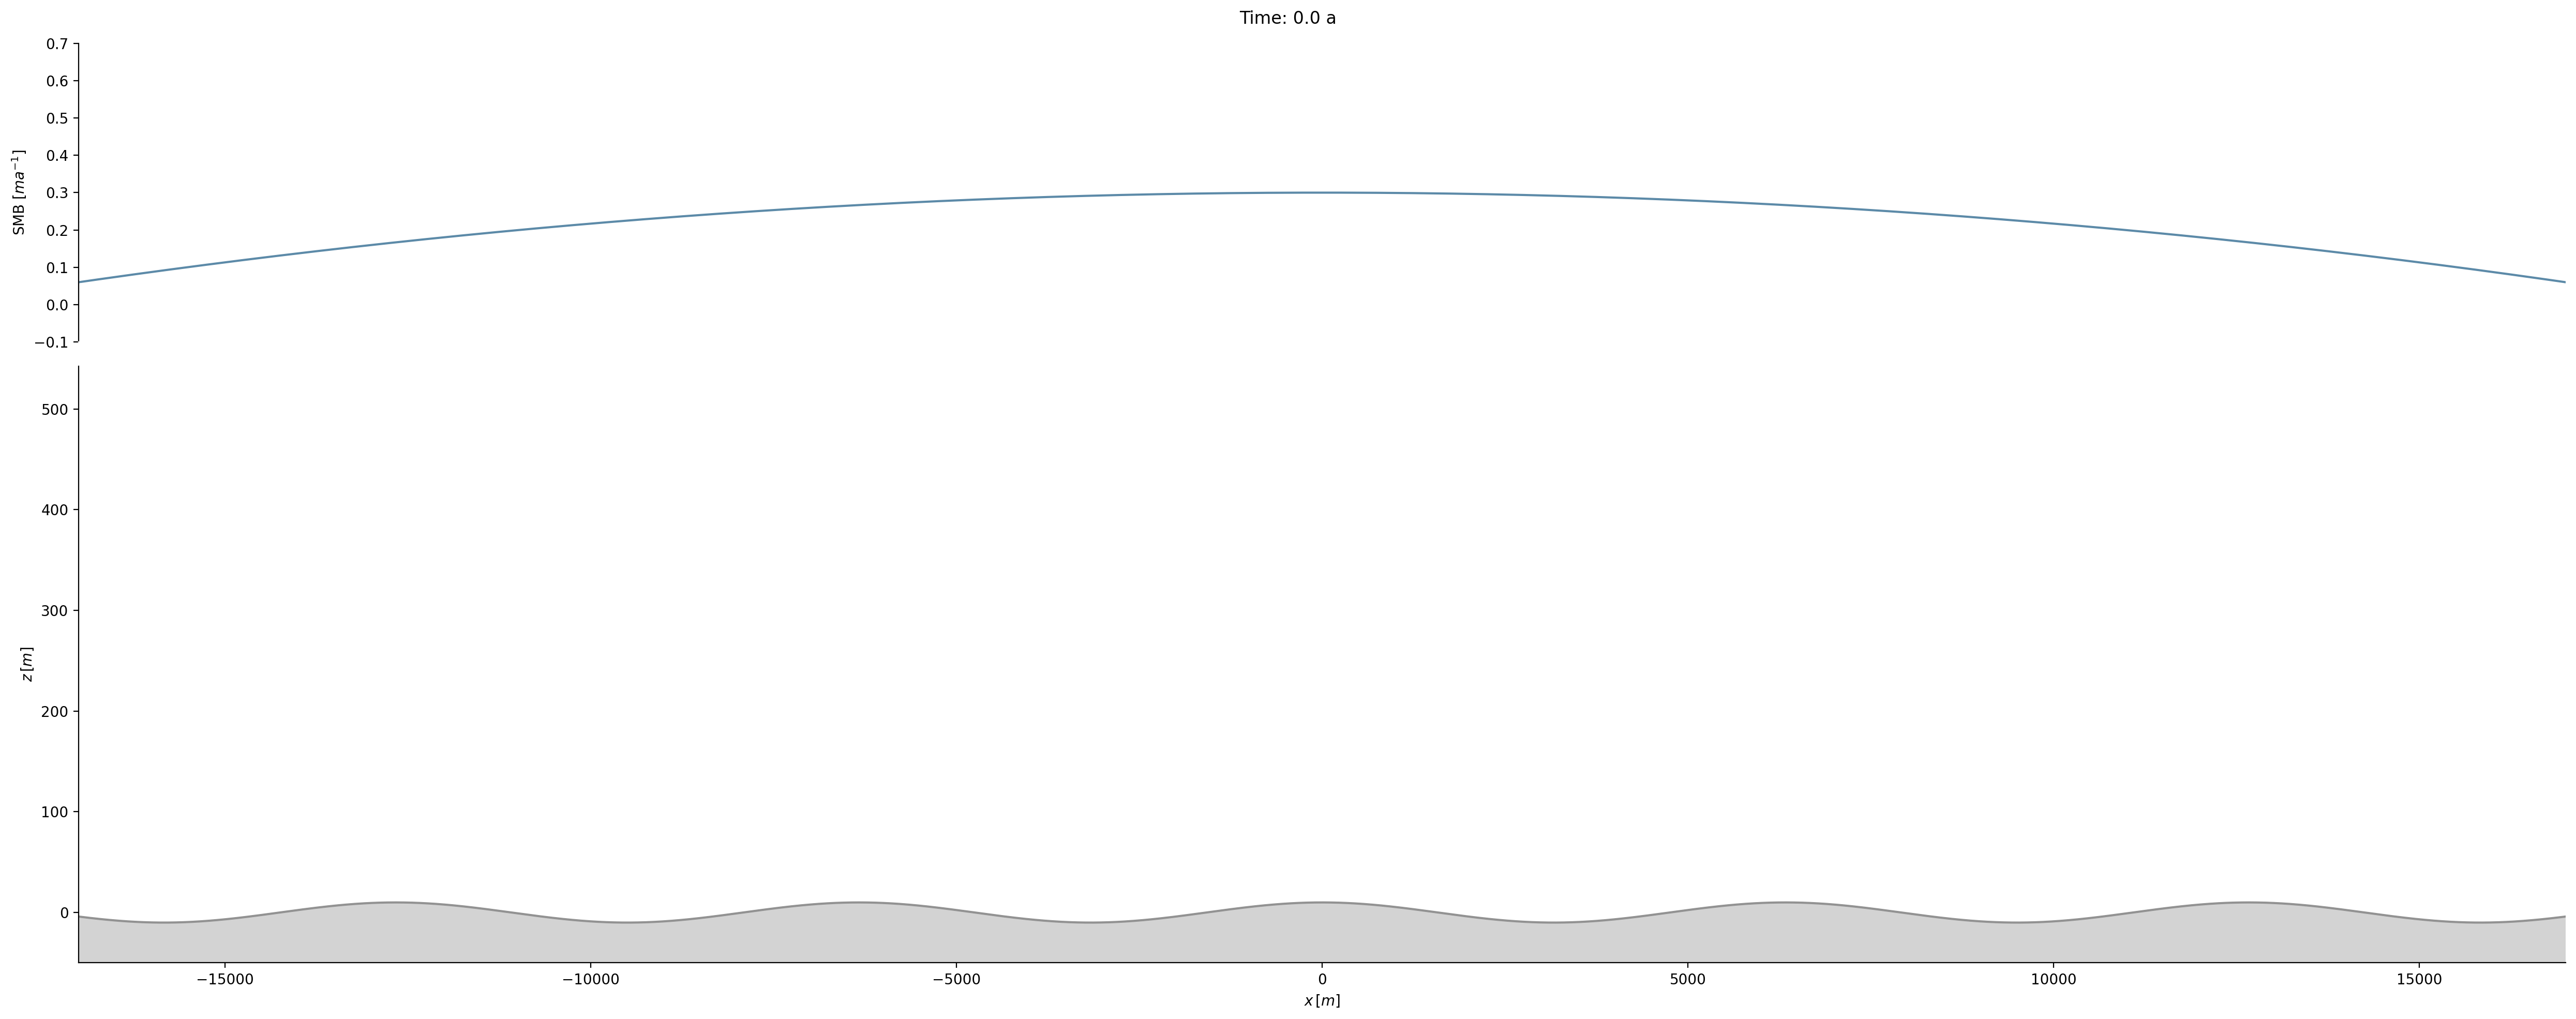

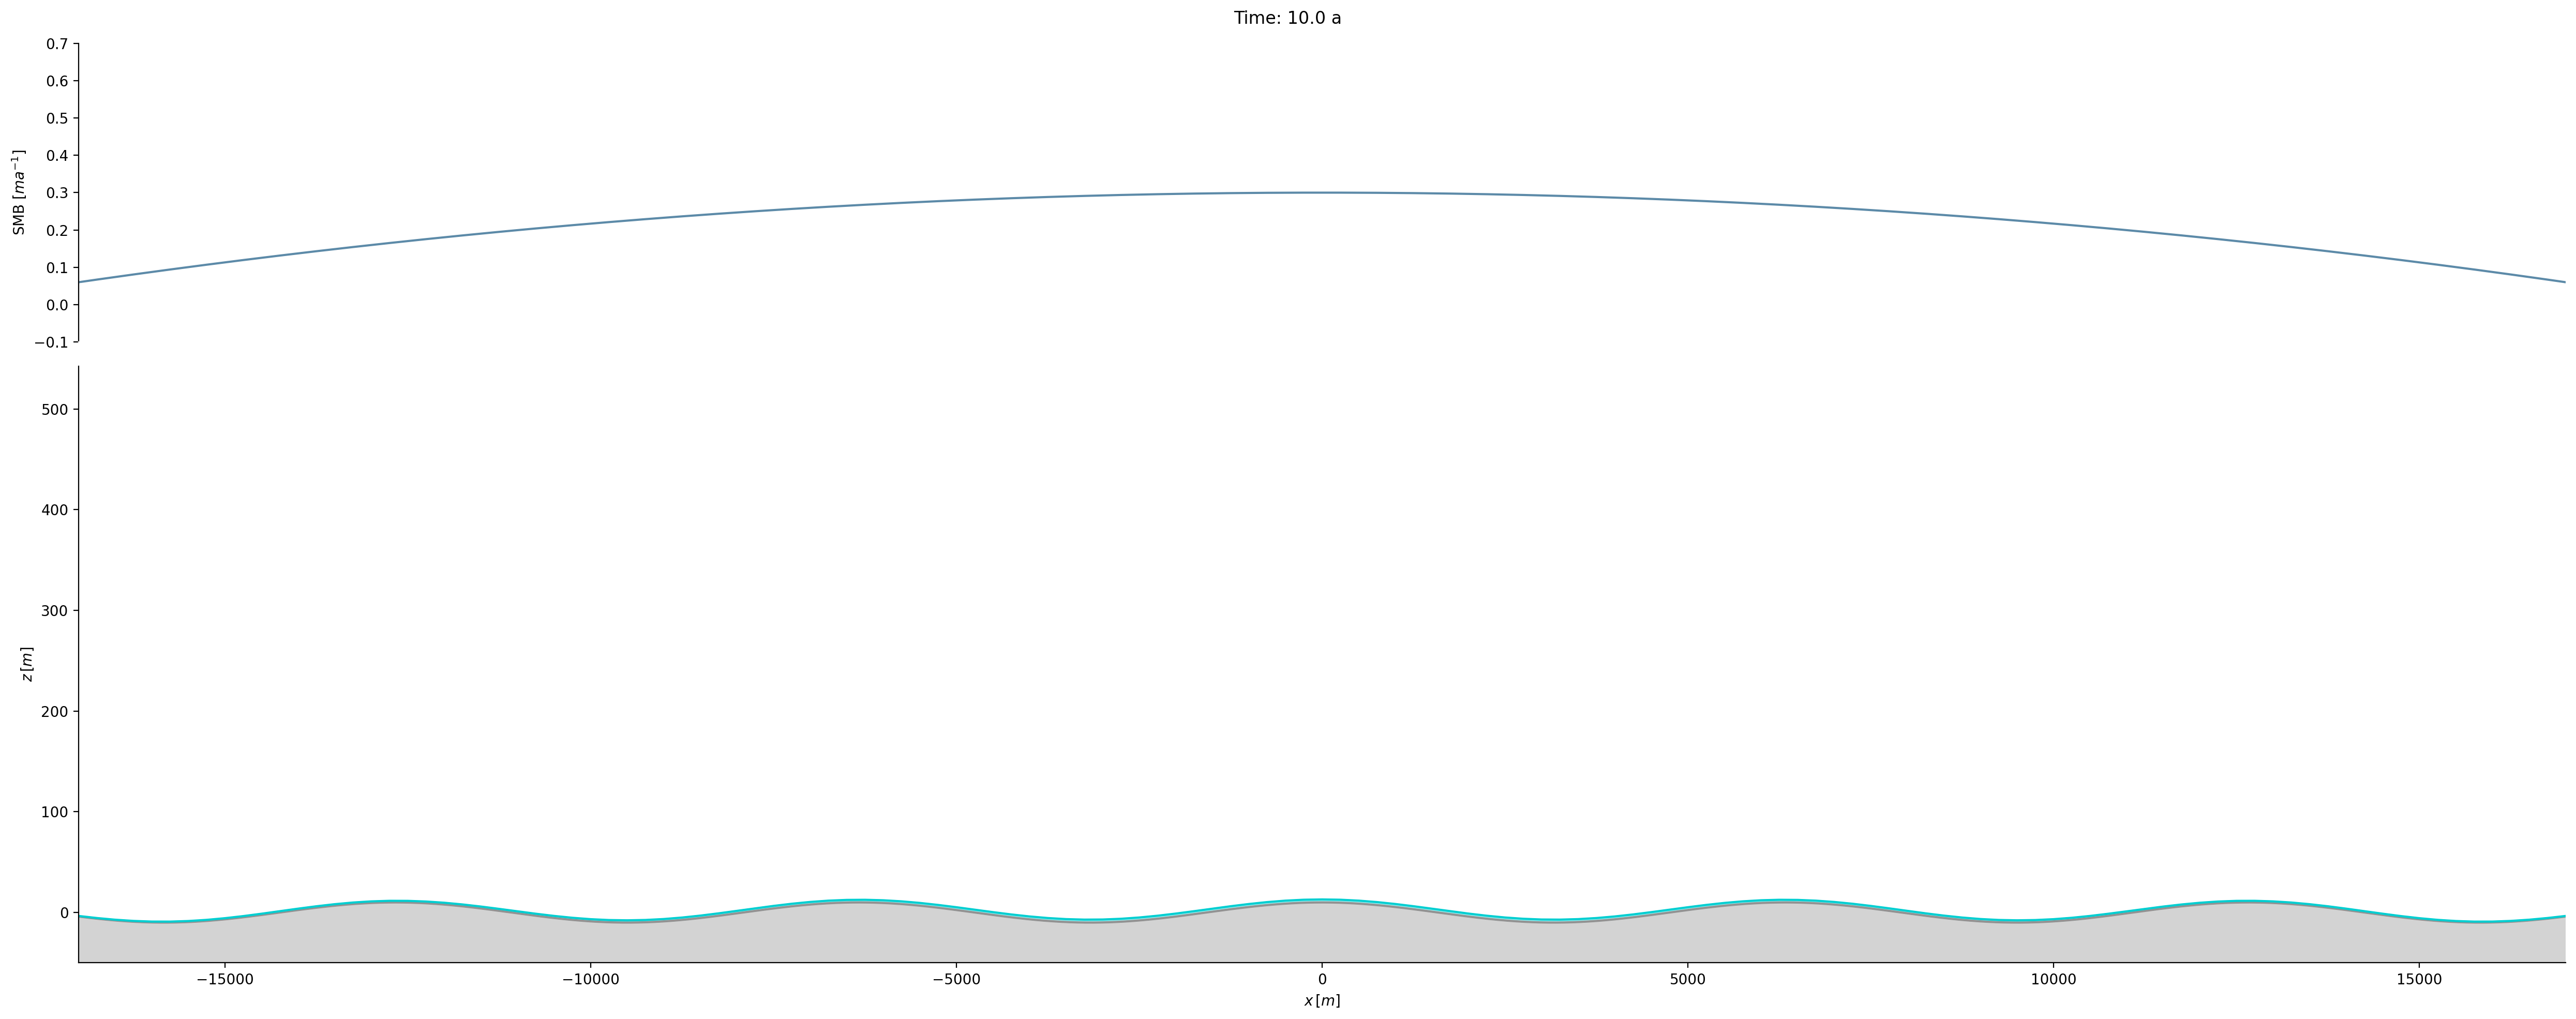

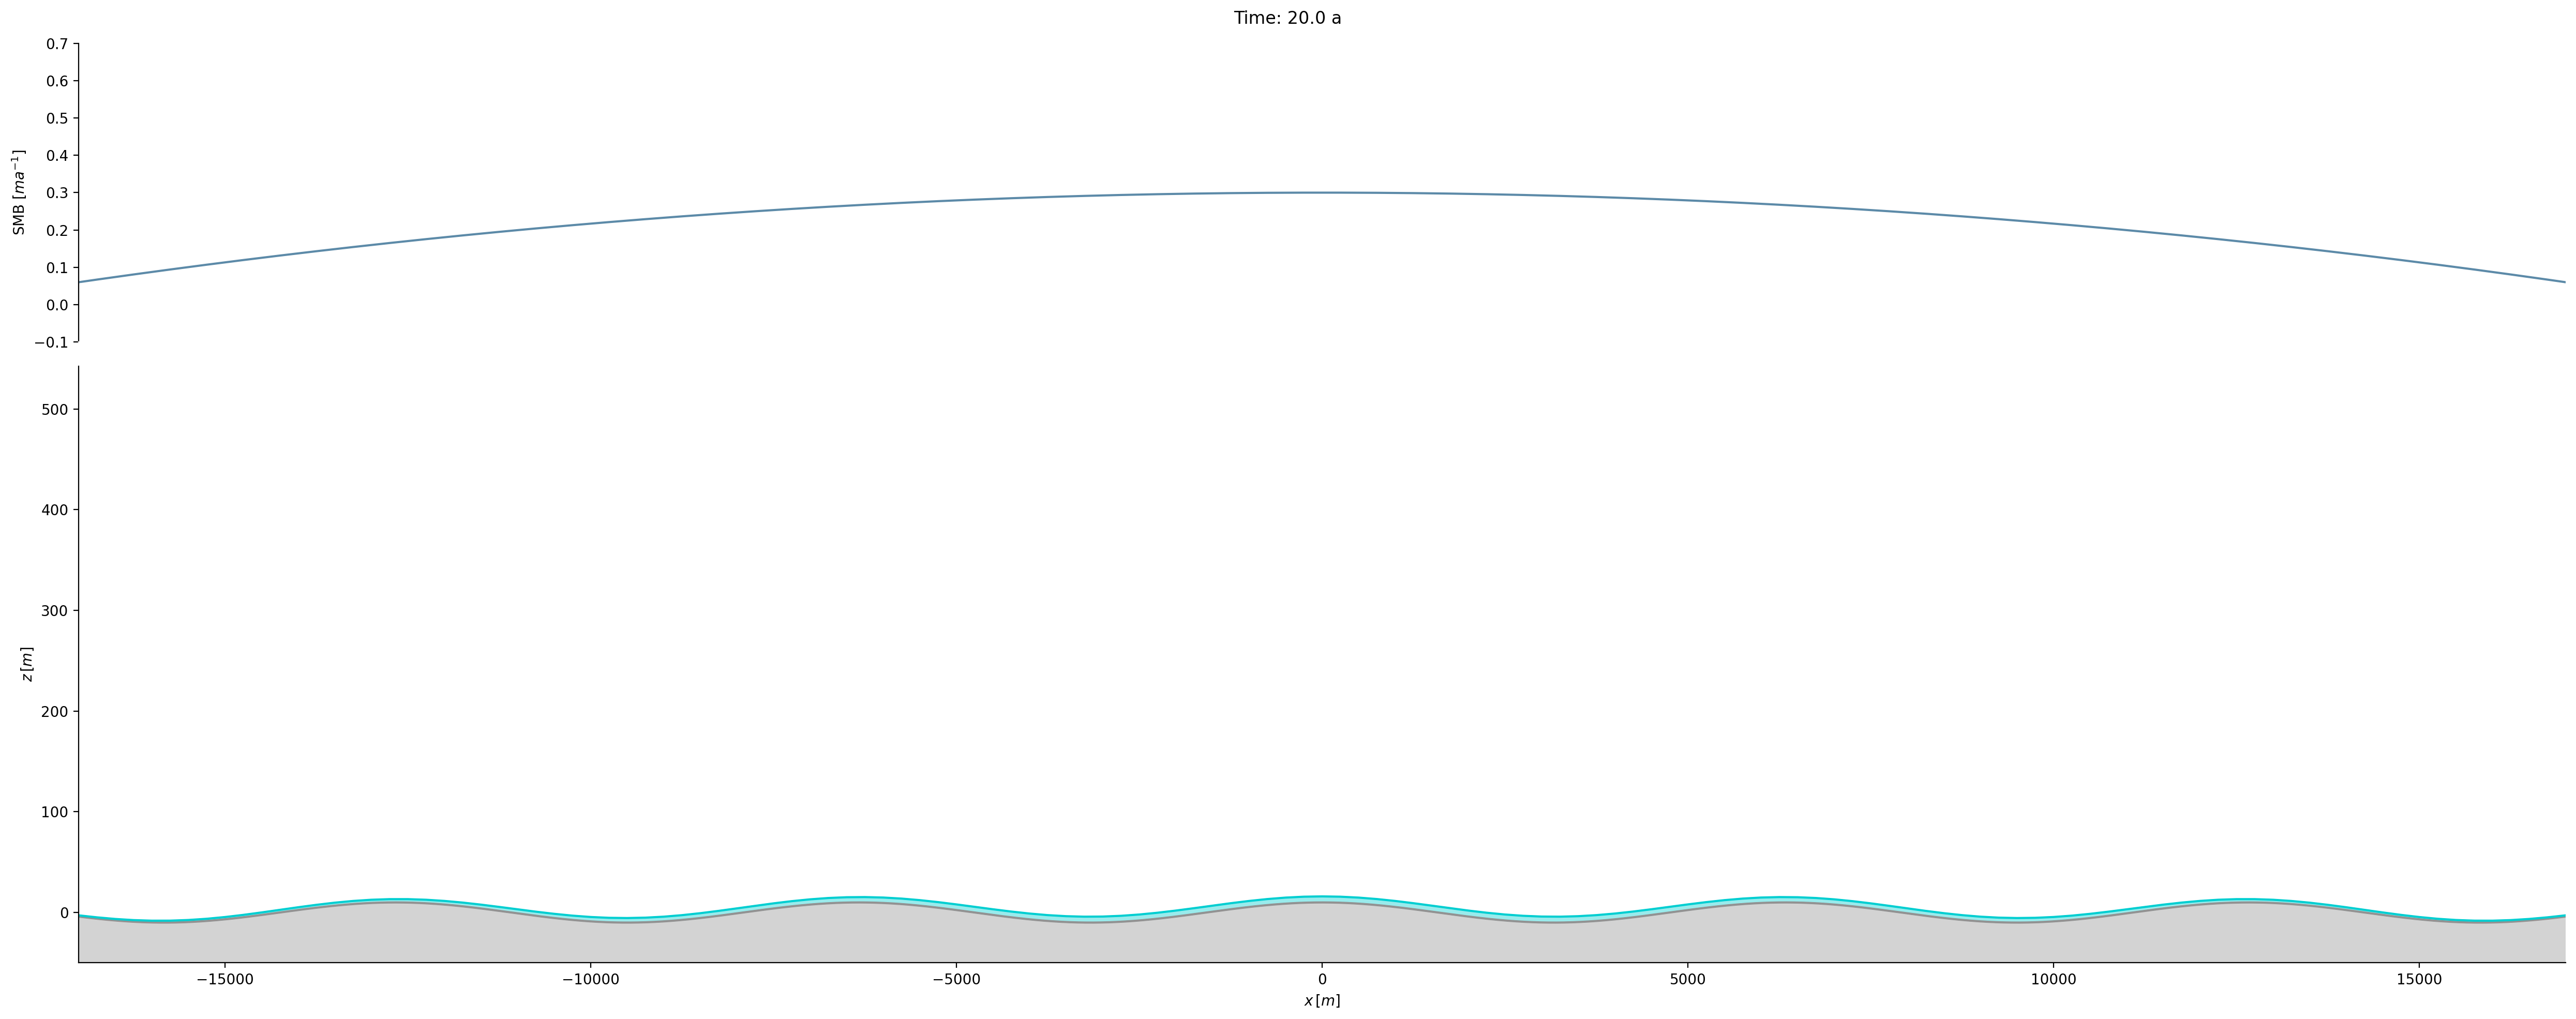

In [5]:
fig,ax=animate(x,bed,sol_h,a_s,A,rho,g,n,dt)

In [ ]:
# ymax=max(sol_h[-1])
# for i in range(0,timesteps+200,200):
#     fig,ax=plt.subplots(2,figsize=(10,5),gridspec_kw = {"height_ratios":[1,4]})
#     #divnorm=colors.TwoSlopeNorm(vmin=np.matrix.min(np.matrix(sol_vx[i])), vcenter=0., vmax=np.matrix.max(np.matrix(sol_vx[i])))
#     ax[0].plot(x,a_s(i,x),color=(.36,.54,.66))
#     ax[0].spines['top'].set_visible(False)
#     ax[0].spines['bottom'].set_color("white")
#     ax[0].axes.get_xaxis().set_visible(False)
#     ax[0].spines['right'].set_visible(False)

#     ax[0].set(ylabel=r"SMB $[ma^{-1}]$")

#    # X=np.meshgrid(x[1:-1])
#    # Z_new = [Zp[i][j,1:-1] for j in range(len(Zp[i]))]
#    # cp=plt.pcolormesh(X,Z_new,sol_vx[i],cmap="RdBu",norm=divnorm)
#    # plt.colorbar(cp,label=r"$v_x\,[ma^{-1}]$",ticks=np.append(np.append(np.linspace(np.matrix.min(np.matrix(sol_vx[i])),0,5),0),np.linspace(0,np.matrix.max(np.matrix(sol_vx[i])),3)[1:]))
#     ax[1].plot(x,bed,"-",color=(206/255,206/255,206/255),markersize=1,label="bed")
#     ax[1].plot(x,sol_h[i],"-",color=(0/255,206/255,209/255),markersize=1,label="surface")
#     ax[1].set_ylim(-50,ymax+50)
#     ax[1].spines['top'].set_visible(False)
#     ax[1].spines['right'].set_visible(False)
#     ax[1].set(xlabel=r"$x\,[m]$",ylabel=r"$z\,[m]$")
#     fig.suptitle(f"Time: {i*dt} a")
#     fig.tight_layout()
#     plt.savefig(f".\\Test_Results\\for_Reinhard\\Evolving_from_tiny_via\\anim_step{i*dt}.png")
#     plt.close(fig)